### Solution By: Vipin Choudhary
Last updated September 18, 2020
___
### Project - Thera Bank Personal Loan Campaign

### Problem Statement:
This case is about a bank (TheraBank) whose management wants to explore ways of converting its  liability  customers  to  personal  loan  customers  (while  retaining  them  as  depositors).  A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over  9% success.  This  has  encouraged  the  retail  marketing  department  to  devise  campaigns with better target marketing to increase the success ratio with a minimal budget.

### Objective:
##### Goal is to predict the likelihood of a liability customer's acceptance of personal loans.

____
#### Github Link:
https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-jul20-vipinexl/blob/master/Bank_Loan_Campaign.ipynb

#### Import Library, Load Data & Basic Checks

In [1]:
#Packages for data processing
import pandas as pd
import numpy as np

#Packages for Ploting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

#To warnings turn off
import warnings
warnings.filterwarnings('ignore')

#modeling package
from sklearn.model_selection import train_test_split
from scipy import stats
# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [2]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.shape

(5000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### Insights:
        1. ID is unique key which needs to be drop
        2. Need to review Experience as minimun is -3 which doesn't seems normal
        3. Min CCAvg is 0 which seems okay
        4. In Mortgage, Personal Loan, Securities Account, CD Account, Online & CreditCard we observe 0 which seems normal

In [6]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
df.isnull().values.any()

False

#### EDA

###### NUMBER OF UNIQUE IN EACH COLUMN

In [8]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

###### Number of people with zero Mortgages


In [9]:
df['Mortgage'].isin([0]).sum()

3462

###### Total 3,462 customers have zero Mortgage

###### Number of people with zero credit card spending per month?

In [10]:
df['CCAvg'].isin([0]).sum()

106

#### A total of 106 people have zero credit card spending per month

###### Value Count of All Categorical Columns

In [11]:
df['Family'].value_counts(True)

1    0.2944
2    0.2592
4    0.2444
3    0.2020
Name: Family, dtype: float64

In [12]:
df['Online'].value_counts(True)

1    0.5968
0    0.4032
Name: Online, dtype: float64

In [13]:
df['CreditCard'].value_counts(True)

0    0.706
1    0.294
Name: CreditCard, dtype: float64

In [14]:
df['Securities Account'].value_counts(True)

0    0.8956
1    0.1044
Name: Securities Account, dtype: float64

In [15]:
df['Education'].value_counts(True)

1    0.4192
3    0.3002
2    0.2806
Name: Education, dtype: float64

In [16]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [17]:
df['CD Account'].value_counts(True)

0    0.9396
1    0.0604
Name: CD Account, dtype: float64

### Univariate and Bivariate Analysis

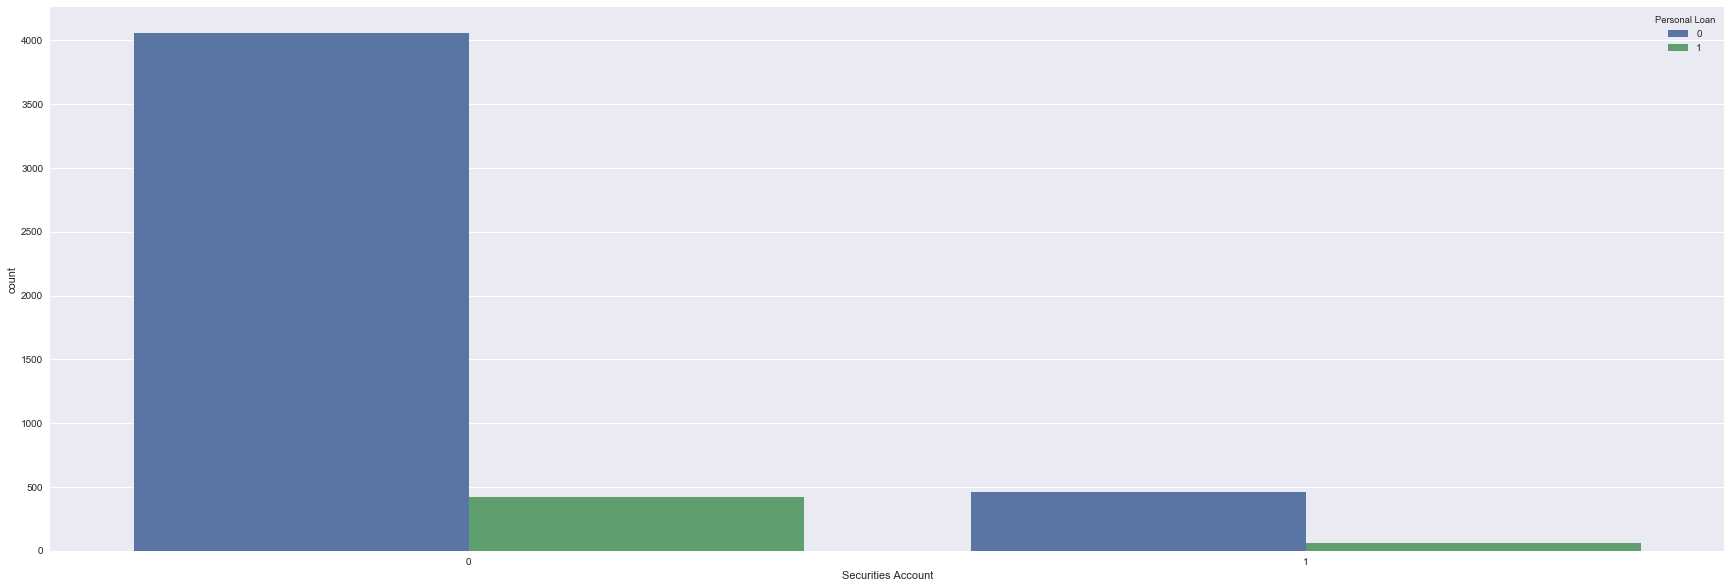

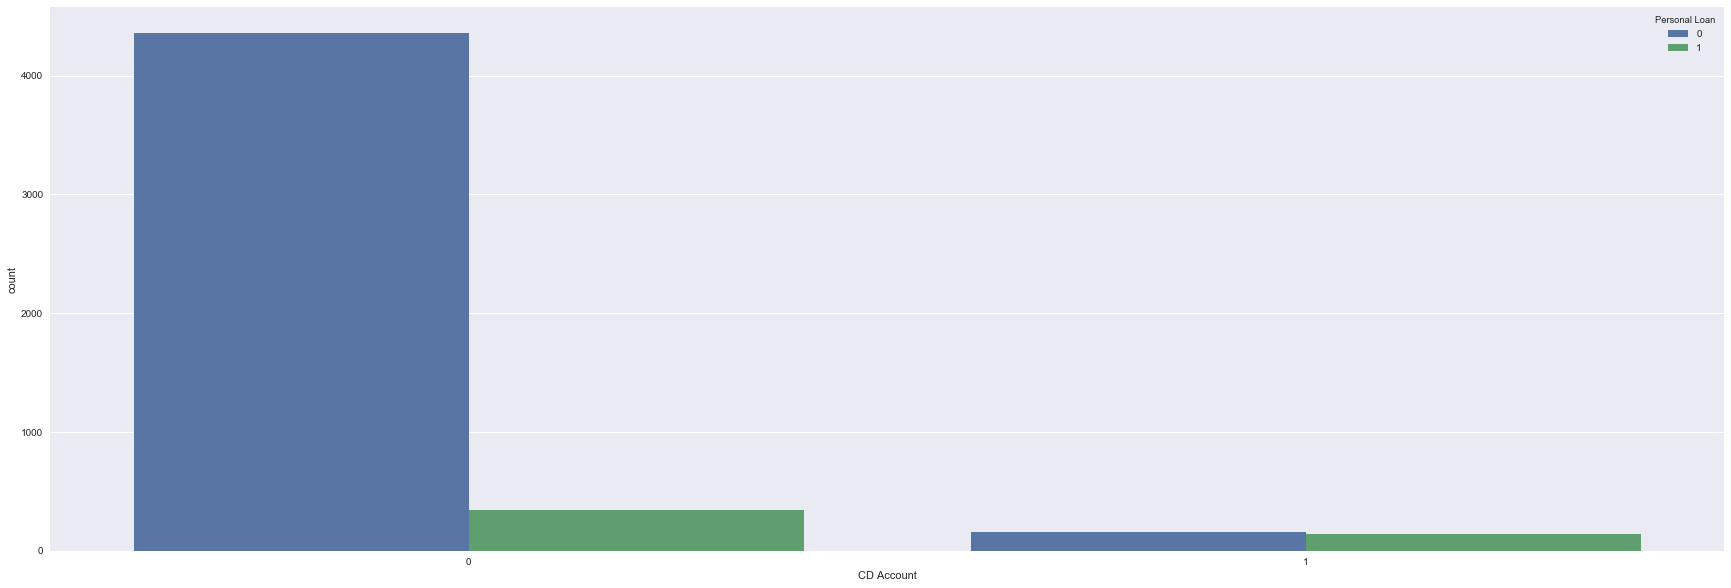

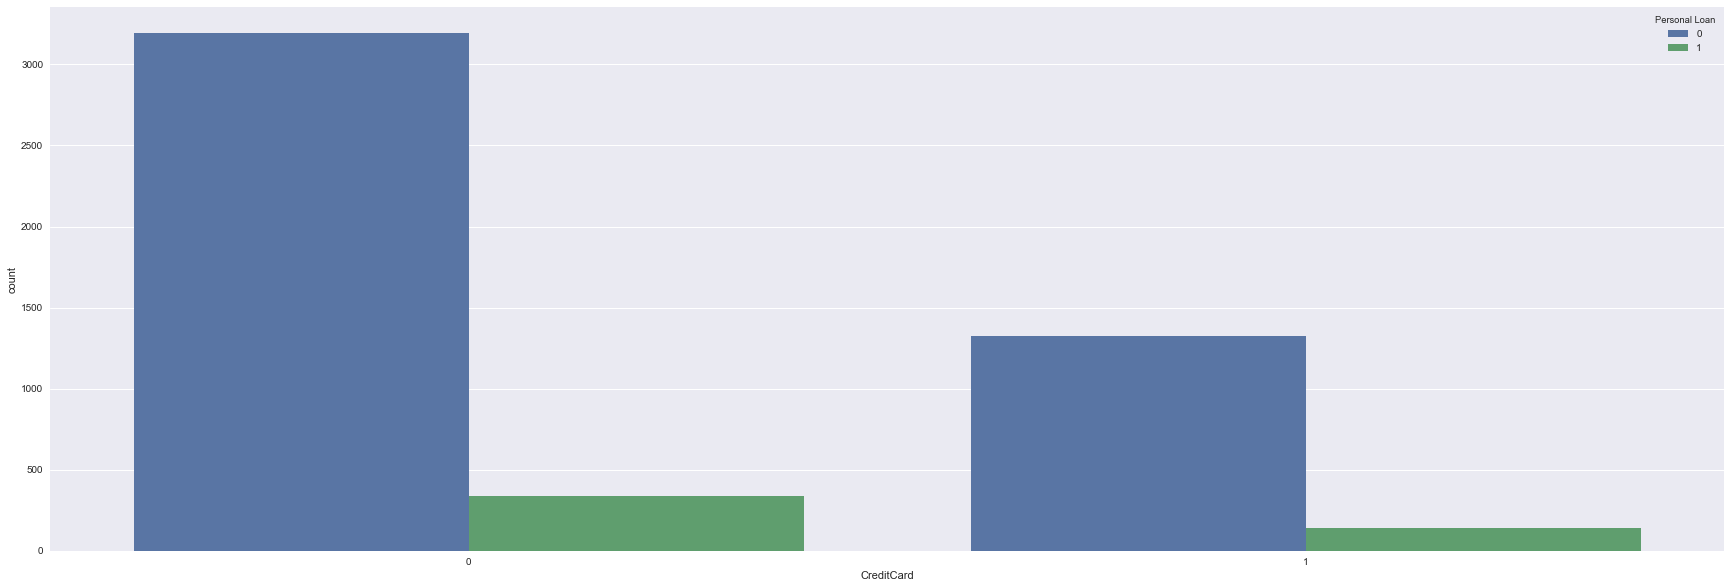

In [18]:
plt.figure(figsize=(30,10))
sns.countplot(x=df['Securities Account'],hue=df['Personal Loan'])

plt.figure(figsize=(30,10))
sns.countplot(x=df['CD Account'],hue=df['Personal Loan'])

plt.figure(figsize=(30,10))
sns.countplot(x=df['CreditCard'],hue=df['Personal Loan'])

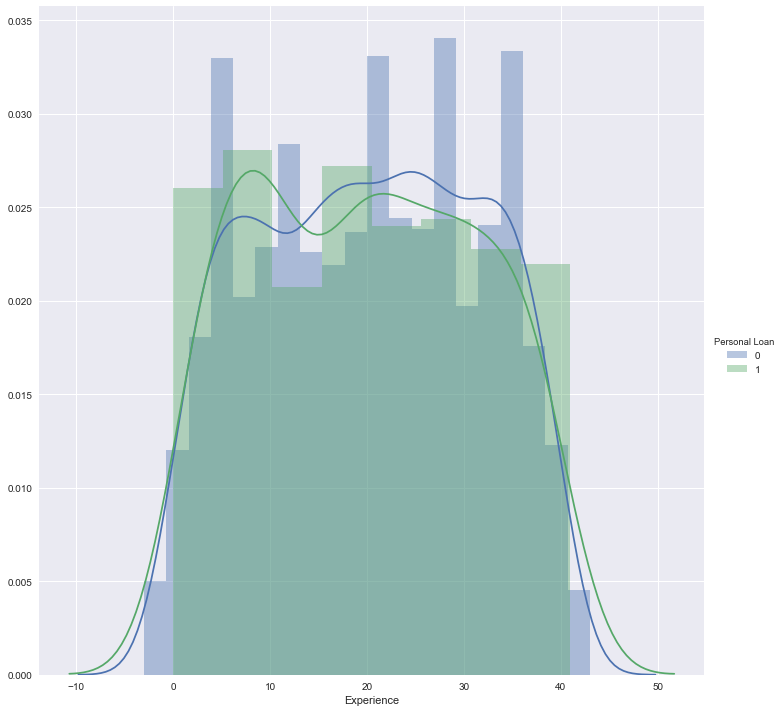

In [19]:
sns.FacetGrid(df,hue="Personal Loan",size =10).map(sns.distplot,"Experience").add_legend()

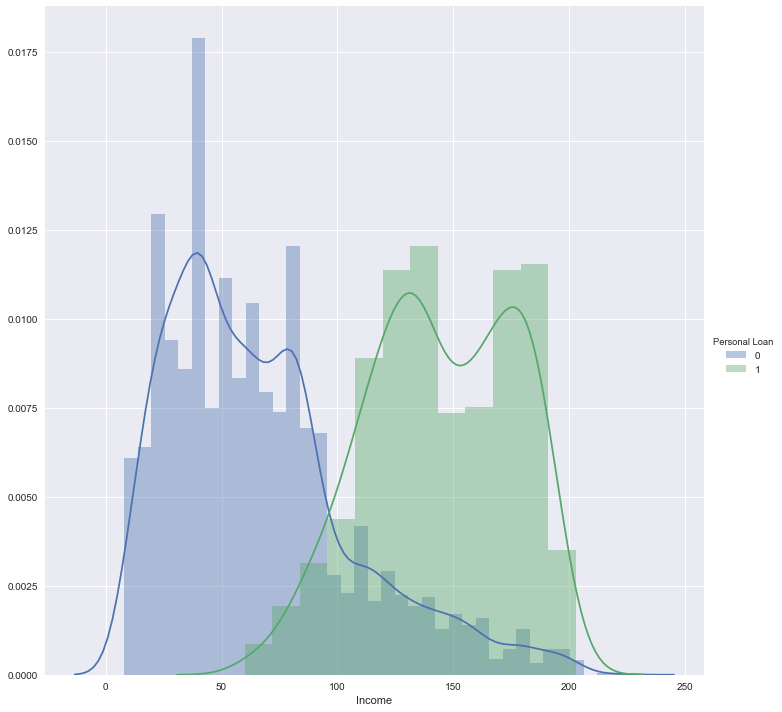

In [20]:
sns.FacetGrid(df,hue="Personal Loan",size =10).map(sns.distplot,"Income").add_legend()

#### There is a higher chance of acceptance of personal loan if customer's salary is more than 90K. Peak for acceptance of 
#### Personal loan from salary prespective is between 120 to 140K and 160 to 190K


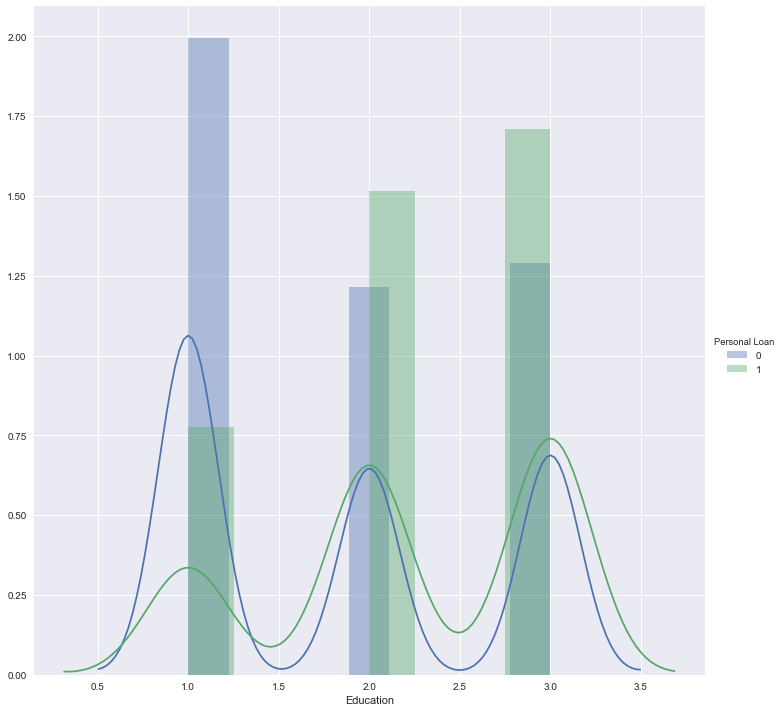

In [21]:
sns.FacetGrid(df,hue="Personal Loan",size =10).map(sns.distplot,"Education").add_legend()

#### The more the education is, higher the chance of Personal loan acceptance

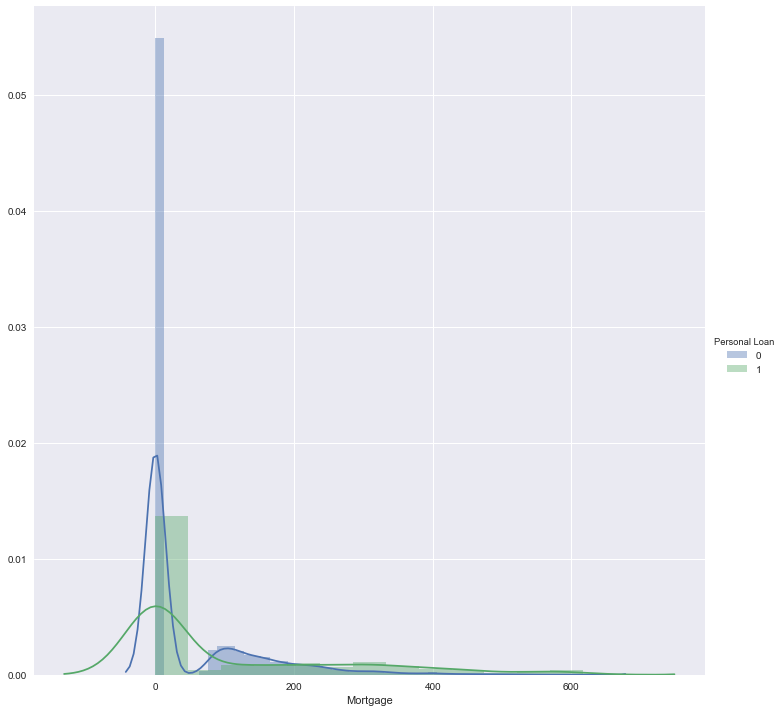

In [22]:
sns.FacetGrid(df,hue="Personal Loan",size =10).map(sns.distplot,"Mortgage").add_legend()

#### Higher value of house Mortgage corresponds to higher acceptance of Personal loan 

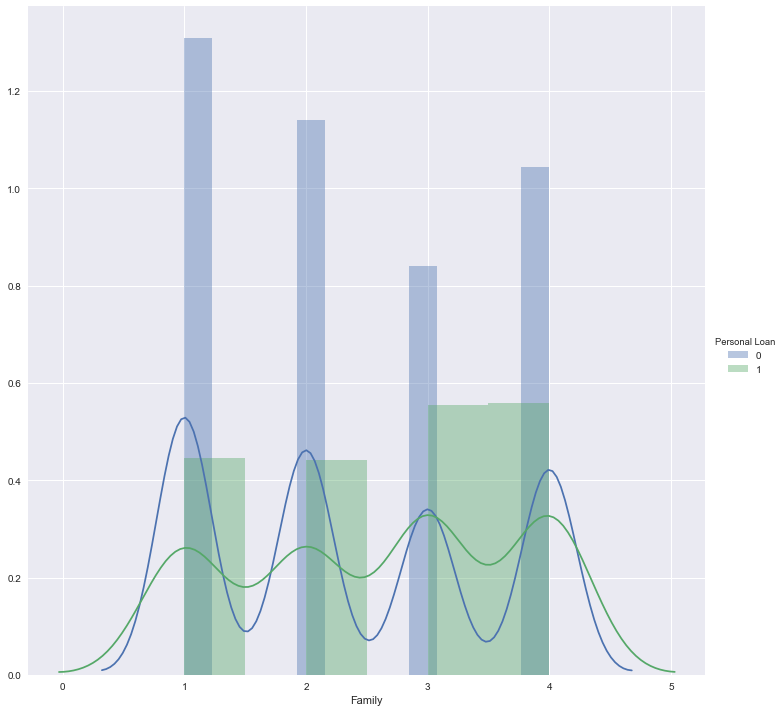

In [23]:
sns.FacetGrid(df,hue="Personal Loan",size =10).map(sns.distplot,"Family").add_legend()

#### Acceptance of Personal loan is more for family of 3 & 4 as compared to family of 1 & 2

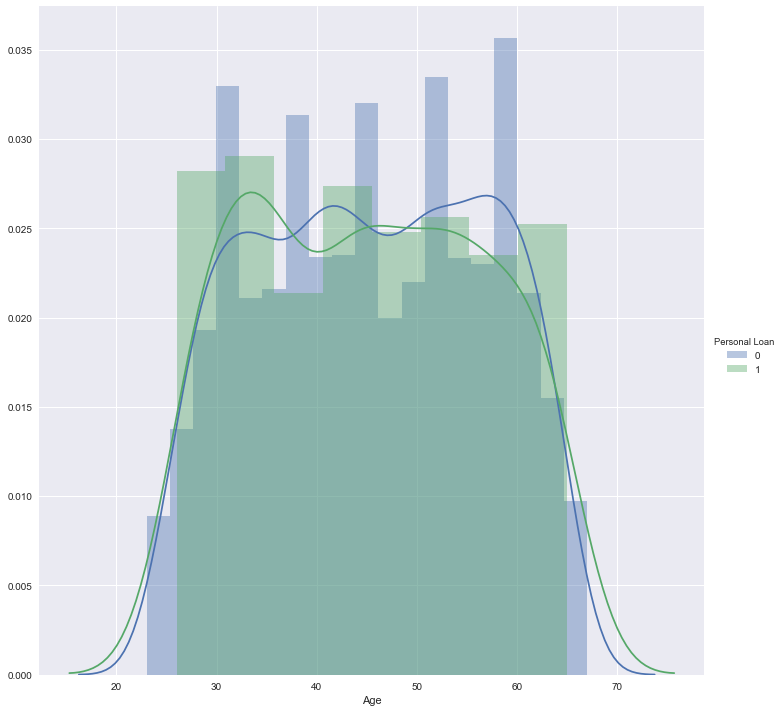

In [24]:
sns.FacetGrid(df,hue="Personal Loan",size =10).map(sns.distplot,"Age").add_legend()

###### Highest acceptance of personal loan is of the customers having Age between 25 to 35. 
###### Chances of acceptance of personal loan dimishes if age reaches 65. 

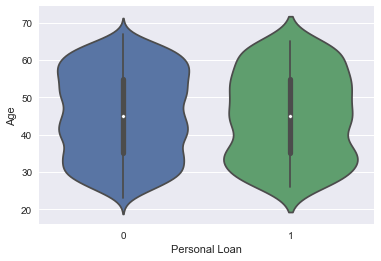

In [25]:
sns.violinplot(x='Personal Loan',y='Age',data = df)
plt.show()

<function matplotlib.pyplot.show>

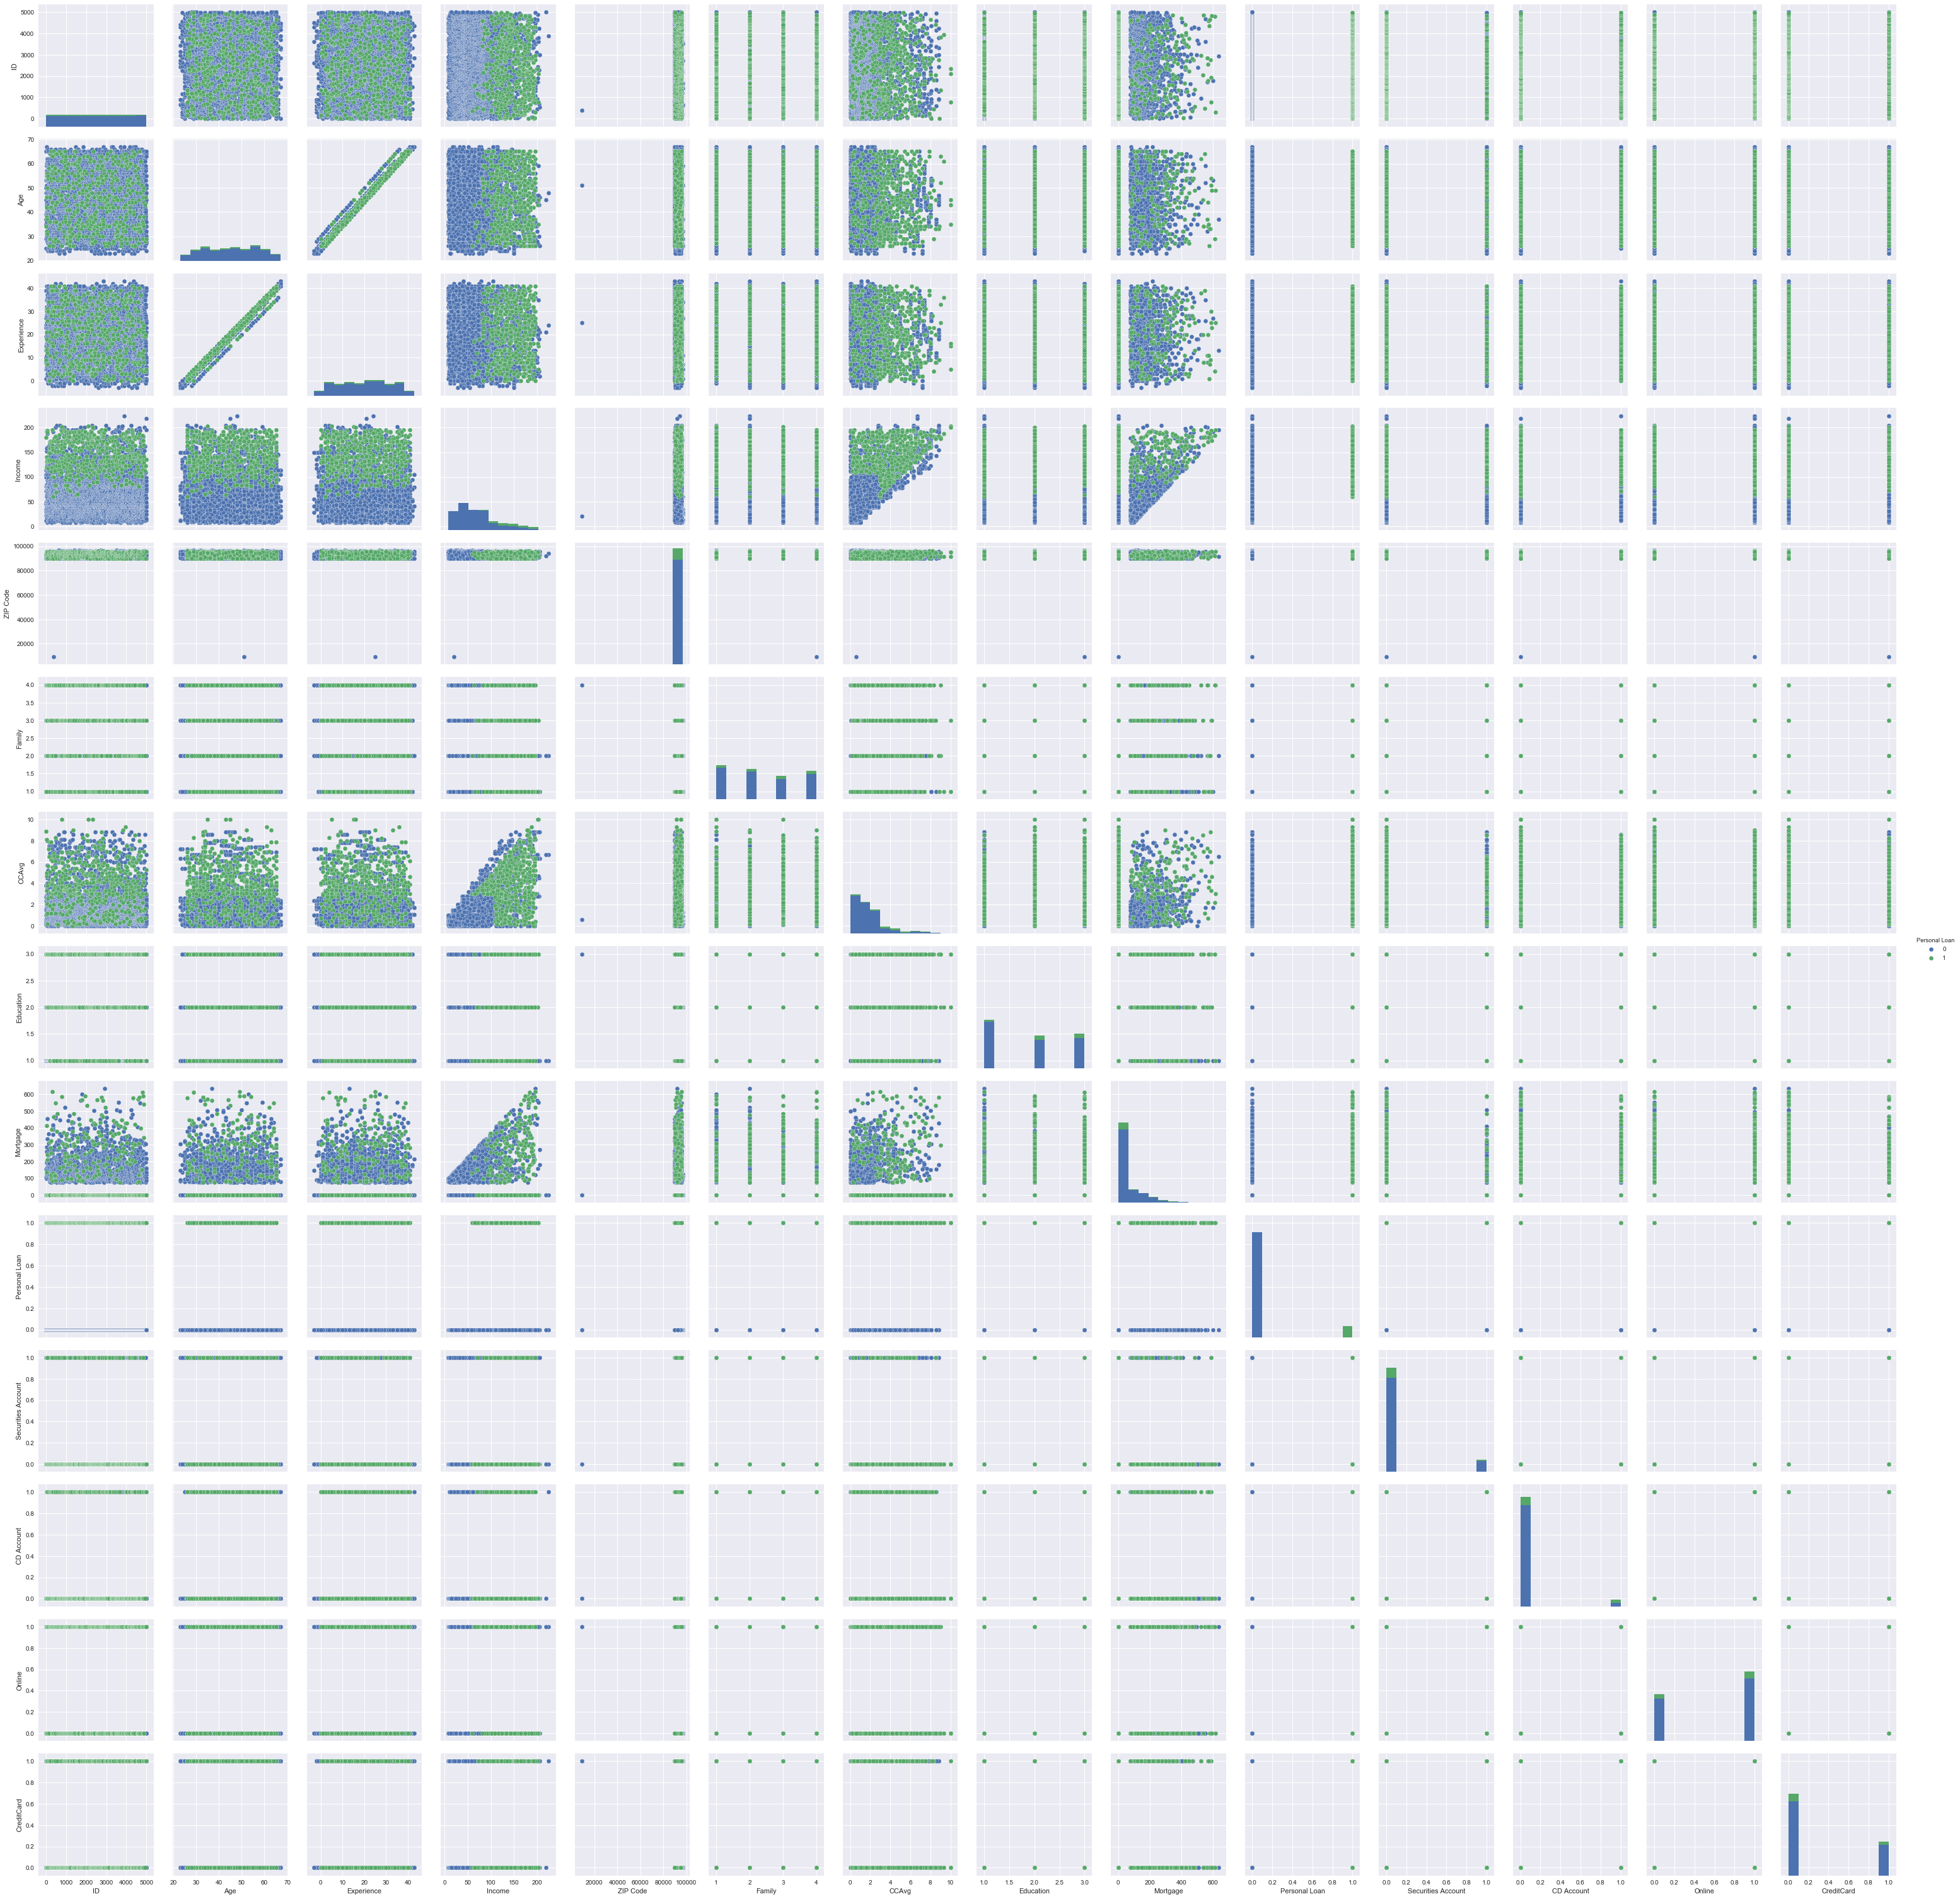

In [26]:
sns.pairplot(df,hue = "Personal Loan", size = 3)
plt.show

#### Identify Coorelation in data

In [27]:
def plot_corr(df, size=18):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

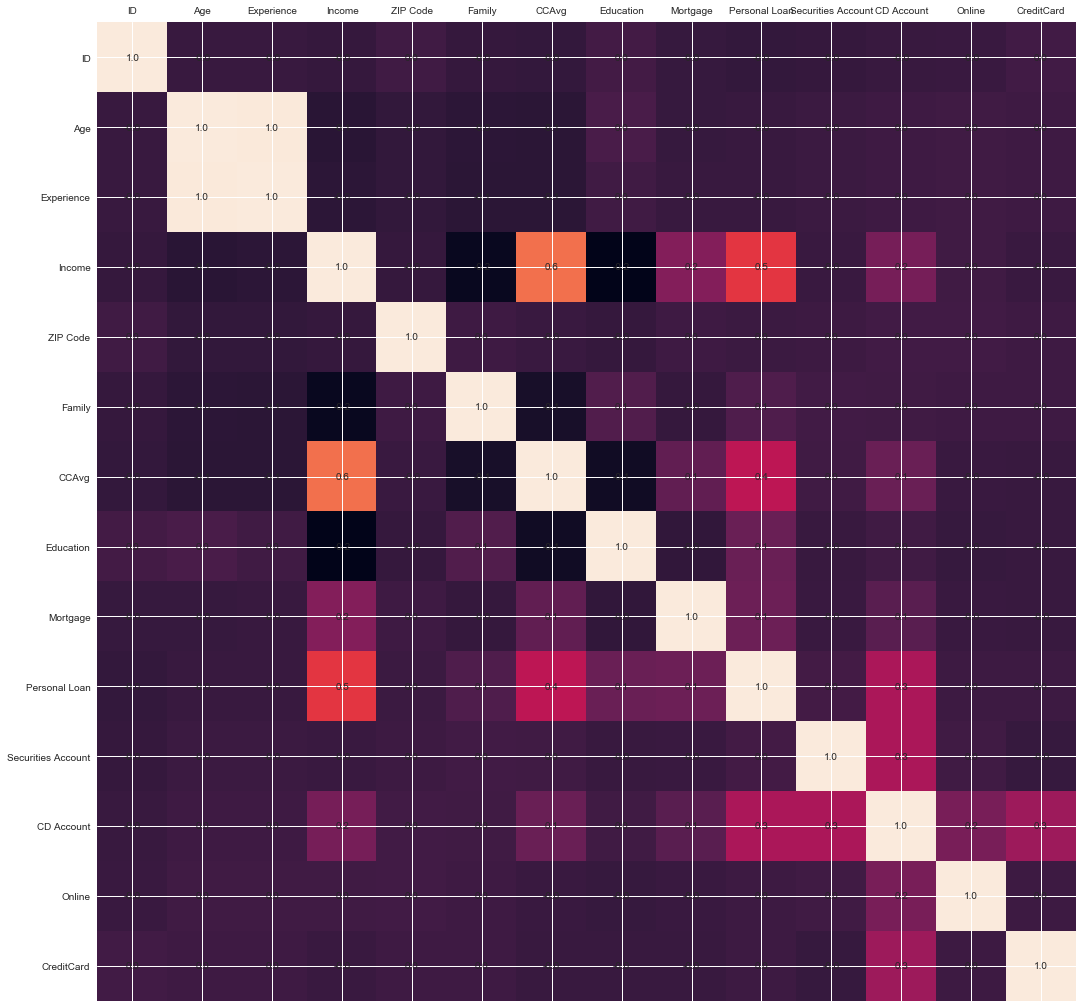

In [28]:
plot_corr(df)

### Get Data Model Ready

###### Converting Family & Education as Category

In [29]:
df['Family']=df['Family'].astype('category')
df['Education']=df['Education'].astype('category')

In [30]:
# droping unique key column
cr_df = df.drop('ID', axis =1 )
cr_df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [31]:
#zip code has no association with Personal Loan so dropping this variable

cd_df = cr_df.drop('ZIP Code', axis =1 )
cd_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [32]:
# Getting rid of negative values for numeric variables as seen for column Experience

num = cd_df._get_numeric_data()
num[num < 0] = 0
cd_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.119600,11.440484,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0
Online,5000.0,0.596800,0.490589,0.0,0.0,1.0,1.0,1.0
CreditCard,5000.0,0.294000,0.455637,0.0,0.0,0.0,1.0,1.0


## Split the data into training and test set in the ratio of 70:30 respectively

In [33]:
# independant variables
X = cd_df.drop(["Personal Loan"], axis=1)
# the dependent variable
Y = cd_df[["Personal Loan"]]
cd_df.shape


(5000, 12)

##### Creating Dummy Variables 

In [34]:
X = pd.get_dummies(X,columns = ['Education','Family'],drop_first = True)
X.head()

,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_2,Education_3,Family_2,Family_3,Family_4
0,25,1,49,1.6,0,1,0,0,0,0,0,0,0,1
1,45,19,34,1.5,0,1,0,0,0,0,0,0,1,0
2,39,15,11,1.0,0,0,0,0,0,0,0,0,0,0
3,35,9,100,2.7,0,0,0,0,0,1,0,0,0,0
4,35,8,45,1.0,0,0,0,0,1,1,0,0,0,1


In [35]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

y_test["Personal Loan"].value_counts()

0    1351
1     149
Name: Personal Loan, dtype: int64

##### Checking data split

In [36]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(cd_df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(cd_df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


##### Check loan acceptance ratio in split data


In [37]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(cd_df.loc[cd_df['Personal Loan'] == 1]), (len(cd_df.loc[cd_df['Personal Loan'] == 1])/len(cd_df.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(cd_df.loc[cd_df['Personal Loan'] == 0]), (len(cd_df.loc[cd_df['Personal Loan'] == 0])/len(cd_df.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train['Personal Loan'] == 1]), (len(y_train[y_train['Personal Loan'] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train['Personal Loan'] == 0]), (len(y_train[y_train['Personal Loan'] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test['Personal Loan'] == 1]), (len(y_test[y_test['Personal Loan'] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test['Personal Loan'] == 0]), (len(y_test[y_test['Personal Loan'] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4520 (90.40%)

Training Personal Loan True Values    : 331 (9.46%)
Training Personal Loan False Values   : 3169 (90.54%)

Test Personal Loan True Values        : 149 (9.93%)
Test Personal Loan False Values       : 1351 (90.07%)



In [38]:
x_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 2764 to 1458
Data columns (total 14 columns):
Age                   1500 non-null int64
Experience            1500 non-null int64
Income                1500 non-null int64
CCAvg                 1500 non-null float64
Mortgage              1500 non-null int64
Securities Account    1500 non-null int64
CD Account            1500 non-null int64
Online                1500 non-null int64
CreditCard            1500 non-null int64
Education_2           1500 non-null uint8
Education_3           1500 non-null uint8
Family_2              1500 non-null uint8
Family_3              1500 non-null uint8
Family_4              1500 non-null uint8
dtypes: float64(1), int64(8), uint8(5)
memory usage: 124.5 KB


### Logistic regression and Chi^2 probability distribution testing to test the significance of columns on the dependent variables

In [39]:
import statsmodels.api as sm

In [40]:
logit = sm.Logit(y_train, sm.add_constant(x_train))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.107508
         Iterations 10


In [41]:
from scipy import stats
stats.chisqprob = lambda chisq, cd_df: stats.chi2.sf(chisq, cd_df)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3485
Method:                           MLE   Df Model:                           14
Date:                Fri, 18 Sep 2020   Pseudo R-squ.:                  0.6565
Time:                        20:03:44   Log-Likelihood:                -376.28
converged:                       True   LL-Null:                       -1095.5
                                        LLR p-value:                8.933e-299
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -13.1804      2.228     -5.916      0.000     -17.547      -8.814
Age                   -0.0093      0.082     -0.114      0.910      -0.169       0.151
Experience          

##### Interpretation of Pseudo R^2
A pseudo R^2 of 65% indicates that 65% of the uncertainity of the intercept only model

In [42]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state =7)
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=7, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
# Confusion matrix for train data
predict_train = logreg.predict(x_train)
cm_train = metrics.confusion_matrix(y_train,predict_train)
print('confusion_matrix = \n',cm_train)

confusion_matrix = 
 [[3136   33]
 [ 106  225]]


In [44]:
# Confusion matrix for test data
predict_test = logreg.predict(x_test)
cm_test = metrics.confusion_matrix(y_test,predict_test)
print('confusion_matrix = \n',cm_test)

confusion_matrix = 
 [[1340   11]
 [  60   89]]


In [45]:
#Calculate the odds ratio
lgcoef = pd.DataFrame(lg.params,columns = ['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability']=lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

##### Filter by significant P- Value (pval <0.1) and sort descending by odds ratio

In [46]:
lgcoef = lgcoef.sort_values(by = "Odds_ratio",ascending = False)
pval_filter = lgcoef['pval']<=0.1
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
Education_3,4.27,71.73,0.99,0.00
Education_2,4.01,54.92,0.98,0.00
CD Account,3.71,40.79,0.98,0.00
Family_3,2.49,12.04,0.92,0.00
Family_4,1.64,5.16,0.84,0.00
CCAvg,0.25,1.28,0.56,0.00
Income,0.06,1.06,0.52,0.00
Online,-0.59,0.56,0.36,0.00
CreditCard,-1.00,0.37,0.27,0.00
Securities Account,-1.07,0.34,0.26,0.01


### Logistic Regression - Loop 2 once we understood the significance of Variables on underlying dependent variable
Now we understood that Mortgage, Experience and Age have very little to no Significance on dependent variable 

In [47]:
## Dropping the non significant variables where pvalue >.1
## Again split the data into training and test set in the ratio of 70:30 respectively 


# independant variables
X = cd_df.drop(["Personal Loan","Experience","Age","Mortgage"], axis=1)
# the dependent variable
Y = cd_df[["Personal Loan"]]
X.head()

,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard
0,49,4,1.60,1,1,0,0,0
1,34,3,1.50,1,1,0,0,0
2,11,1,1.00,1,0,0,0,0
3,100,1,2.70,2,0,0,0,0
4,45,4,1.00,2,0,0,0,1


In [48]:
X = pd.get_dummies(X,columns = ['Education','Family'],drop_first = True)
X.head()

,Income,CCAvg,Securities Account,CD Account,Online,CreditCard,Education_2,Education_3,Family_2,Family_3,Family_4
0,49,1.60,1,0,0,0,0,0,0,0,1
1,34,1.50,1,0,0,0,0,0,0,1,0
2,11,1.00,0,0,0,0,0,0,0,0,0
3,100,2.70,0,0,0,0,1,0,0,0,0
4,45,1.00,0,0,0,1,1,0,0,0,1


In [49]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

y_test["Personal Loan"].value_counts()

0    1351
1     149
Name: Personal Loan, dtype: int64

In [50]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

     0    1     2    3     4     5    6    7     8    9   10  intercept
0 0.05 0.18 -0.83 2.94 -0.60 -0.88 2.56 2.74 -0.29 1.56 0.97      -9.43


In [51]:
#Scoring the Model
model_score = model.score(x_test, y_test)
model_score


0.95133333333333336

Training accuracy 0.951333333333

Testing accuracy 0.960571428571

Recall Score 0.570469798658

Precision Score 0.904255319149

F1 Score 0.699588477366

Roc AUC Score 0.781904033304



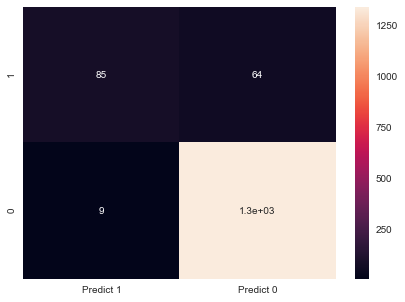

In [52]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
print("Training accuracy",model_score)
print()
print("Testing accuracy",model.score(x_train,y_train))
print()
print("Recall Score",recall_score(y_test, y_predict))
print()
print("Precision Score",precision_score(y_test, y_predict))
print()
print("F1 Score",f1_score(y_test, y_predict))
print()
print("Roc AUC Score",roc_auc_score(y_test, y_predict))
print()


The confusion matrix

True Positives (TP): we correctly predicted that customer accepted Personal loan 85

True Negatives (TN): we correctly predicted that customer accepted Personal loan 1342

False Positives (FP): we incorrectly predicted that customer accepted Personal loan (a "Type I error") 9 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that that customer didn't accept Personal loan (a "Type II error") 64 Falsely predict negative Type II error

### Hence 96% of accuracy

## Model Evaluation
Since we need to minimize the false positive as it is a banking problem and it's highly recommended that we minimize the future losses rather than getting more business, we will try to maximize the precision.

<function matplotlib.pyplot.show>

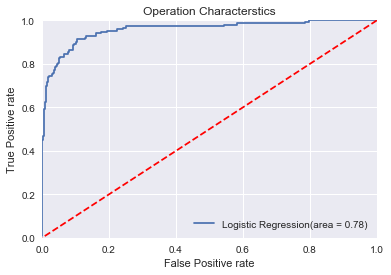

In [53]:
#ROC AUC Curve
logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label = 'Logistic Regression(area = %0.2f)' % logit_roc_auc)
plt.plot([1,0],[1,0],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Operation Characterstics')
plt.legend(loc="lower right")
plt.savefig("Log_ROC")
plt.show

### Check different parameters of Logistic Regression and give your reasoning whether the model performance is affected due to it or not?

#### Changing Threshold

In [54]:
threshold = 0.70
preds = np.where(model.predict_proba(x_test)[:,1]>threshold,1,0)

Recall Score 0.44966442953

precision Score 0.985294117647

F1 Score 0.617511520737

Roc AUC Score 0.72446211854



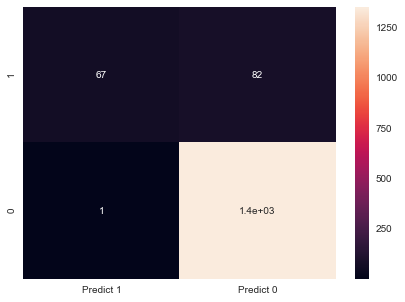

In [55]:
cm=metrics.confusion_matrix(y_test, preds, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
print("Recall Score",recall_score(y_test, preds))
print()
print("precision Score",precision_score(y_test, preds))
print()
print("F1 Score",f1_score(y_test, preds))
print()
print("Roc AUC Score",roc_auc_score(y_test, preds))
print()


#### By considering threshold at 70%, we have achieved 98.5% precision

### Model Performance tuning by changing different parameters of logistic regression

In [56]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': 7,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [57]:
# Running a loop to check different solver values
train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state =41,penalty ='l2',C=.75,solver = i)
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    train_score.append(round(model.score(x_train,y_train),3))
    test_score.append(round(model.score(x_test,y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)
print()    

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.96099999999999997, 0.95999999999999996, 0.95899999999999996, 0.90300000000000002, 0.90500000000000003]

[0.95099999999999996, 0.95299999999999996, 0.95199999999999996, 0.89700000000000002, 0.90000000000000002]



##### As we can see, by using Lib Linear solver, we are achieving greater accuracy as compared to other solvers.

In [58]:
# Running a loop to check different solver values

model = LogisticRegression(random_state =41,penalty ='l1',C=.75,solver = 'liblinear',class_weight = 'balanced')
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
training_accuracy = model.score(x_train,y_train)
print(training_accuracy)
testing_accuracy = model.score(x_test,y_test)
print(testing_accuracy)


0.914285714286
0.914


In [59]:
#Running logistic regression for different values of C
train_score=[]
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state =41,penalty ='l1',C=i,solver = 'liblinear',class_weight = 'balanced')
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    train_score.append(round(model.score(x_train,y_train),3))
    test_score.append(round(model.score(x_test,y_test),3))
    
print(C)
print()
print(train_score)
print()
print(test_score)
print()    



[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.84899999999999998, 0.91100000000000003, 0.91400000000000003, 0.91400000000000003, 0.91400000000000003, 0.91400000000000003]

[0.83299999999999996, 0.90900000000000003, 0.91300000000000003, 0.91300000000000003, 0.91400000000000003, 0.91400000000000003]



##### As we can see, we are achieving greater accuracy with value of Inverse regularization parameter as .75 to 1

## Therefore our final model is the first model with Liblinear solver that we created with a threshold of 70%

In [60]:
# Therefore final model is the first model that we created
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
threshold = 0.70
preds = np.where(model.predict_proba(x_test)[:,1]>threshold,1,0)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
#print(coef_df)
cdf = pd.DataFrame(dict(zip(X.columns,model.coef_[0])),index=['Coefficients']).T
print(cdf)


                    Coefficients
CCAvg                       0.18
CD Account                  2.94
CreditCard                 -0.88
Education_2                 2.56
Education_3                 2.74
Family_2                   -0.29
Family_3                    1.56
Family_4                    0.97
Income                      0.05
Online                     -0.60
Securities Account         -0.83


Training accuracy 0.951333333333

Testing accuracy 0.960571428571

Recall Score 0.44966442953

Precision Score 0.985294117647

F1 Score 0.617511520737

Roc AUC Score 0.72446211854



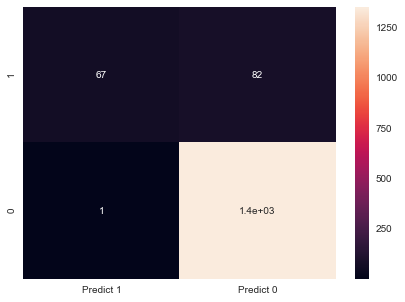

In [61]:
cm=metrics.confusion_matrix(y_test, preds, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
print("Training accuracy",model_score)
print()
print("Testing accuracy",model.score(x_train,y_train))
print()
print("Recall Score",recall_score(y_test, preds))
print()
print("Precision Score",precision_score(y_test, preds))
print()
print("F1 Score",f1_score(y_test, preds))
print()
print("Roc AUC Score",roc_auc_score(y_test, preds))
print()


### Business understanding of the Logistic Model

#####  In total there were 13 dependent variables in the input dataset. By applying logit funtion (1-tail) for the Chi^2 probability distribution, It's evident that Mortgage, Experience and age doesn't have any or very less association with the dependent varaible, hence I dropped these variable. Earlier, we dropped the ID and ZIP column as they also have no significace while fitting a regression model. 
##### Afterwards, I split the model ready dataframe in 70:30 split and created the training and testing dataset.
##### I used liblinear solver to produce by model results initially. This model has a 96% confidence level. 
##### I then went on with the model performance tuning by changing the solver as well as Inverse regularization parameter. The best results came from liblinear solver and C =.75 - 1.00
##### Since in this problem statement, we need to identify the customers accepting personal loan, we need to be extra cautious with the false positive i.e. customer predicted by my model to be accepting Personal loan but they default. Since these scenerios are direct loss for the bank, we have to consider PRECISION in addition to Accuracy. Initially model was working on 50% threshold but when I change the threshold to 70%, the PRECISION was increased by 8.1% and now precision is coming out to be 98.5% with the accuracy of 96% and ROC AUC Percentage of 72.4%